In [200]:
import sklearn.datasets
from IPython.core.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
plt.style.use('dark_background')

Intro + data

In [201]:
#Create a cross-validated machine learning model
#and use it to produce predictions for the testing data.
train_rawdata = pd.read_csv('https://raw.githubusercontent.com/cdavidshaffer/CPSC4970-AI/master/data/m3train.csv')
test_rawdata = pd.read_csv('https://raw.githubusercontent.com/cdavidshaffer/CPSC4970-AI/master/data/m3test.csv')
#ignoring rows with missing values
train_data = train_rawdata.dropna()
test_data = test_rawdata.dropna()

print("train data...")
display(train_data.head())

print("test data...")
display(test_data.head())

#this data is "labeled" The last column is the target.
X_train = train_data.iloc[:, :-1]
#this data does not contain the target column
X_test = test_data.iloc[:, :]
#train target column
y_train = train_data['N']

train data...


,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0.003555,92.159562,6.658918,0.0,1.994330,35.960534,290.003375,20.973961,7.523349,2410.680571,33.715837,1965.274105,34.370406,220.134692
1,0.015362,0.000000,20.380324,0.0,1.738552,35.118264,350.939667,25.471824,15.046698,1970.894250,39.224961,1965.274105,63.081429,198.121223
2,0.015351,0.000000,20.380324,0.0,1.738552,39.296796,271.766966,25.471824,15.046698,1970.894250,39.224961,1945.121257,27.813803,318.278075
3,0.018208,0.000000,6.284173,0.0,1.697776,38.274040,203.714027,31.087615,22.570047,1808.010428,41.208245,1954.034064,20.290963,306.354113
4,0.038841,0.000000,6.284173,0.0,1.697776,39.088964,241.076425,31.087615,22.570047,1808.010428,41.208245,1965.274105,36.785997,332.036493


test data...


,A,B,C,D,E,F,G,H,I,J,K,L,M
0,0.042205,168.959198,6.284173,0.0,1.749673,40.582078,319.804335,15.893032,52.663442,1808.010428,40.54715,1965.274105,44.653922
1,0.027743,168.959198,6.284173,0.0,1.749673,37.459117,312.687688,16.321229,52.663442,1808.010428,40.54715,1965.274105,51.969711
2,0.277305,0.000000,28.538219,0.0,2.016572,36.288691,366.952123,17.012498,30.093396,2475.834100,40.54715,1965.274105,31.333664
3,0.196540,0.000000,28.538219,0.0,2.016572,32.662556,341.154277,15.909954,30.093396,2475.834100,40.54715,1962.006076,68.809830
4,1.482478,0.000000,28.538219,0.0,2.016572,27.198743,168.130791,12.919755,30.093396,2475.834100,40.54715,1735.274150,87.237337


Regularization

Training MSE:  816.4901065354477
Training R2:  0.8752692337802918
-130.45422531097412 [ 16.25394467   0.02164794   0.05405812   0.90816494 -14.85621795
  15.35940784  -0.09816686  -1.71371526   0.13462155  -0.0164658
  -2.5385457    0.030584    -0.15620487]


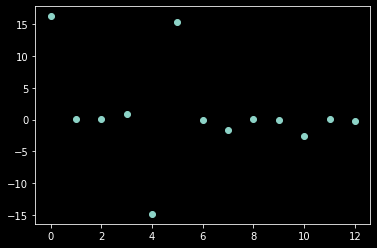

In [202]:
lr = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
train_predicted = lr.predict(X_train)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train, y_train))
print(lr.intercept_, lr.coef_)
plt.scatter(range(len(lr.coef_)), lr.coef_)

Preprocessing - normalizing the data and the target

In [203]:
#below serves to highlight that we need to normalize given ranges of data
display("Displaying training data",train_data.describe())
display("Displaying testing data",test_data.describe())
#creating an object StandardScaler, to proceed with the normalization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
display("normalized trained data...", pd.DataFrame(X_train_scaled).describe())

#normalizing the target -
ttr = TransformedTargetRegressor(regressor=LinearRegression(),
                                transformer=StandardScaler()).fit(X_train_scaled, y_train)

train_predicted = ttr.predict(X_train_scaled)
display("Training MSE after normalizing: ", mean_squared_error(y_train, train_predicted))
print("Training R2 after normalizing: ", ttr.score(X_train_scaled, y_train))

'Displaying training data'

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.240841,81.216869,25.312196,0.610402,1.901232,35.155155,277.079741,22.044135,34.076345,2539.124578,38.717977,1876.419011,73.442306,234.288777
std,0.374535,133.126869,18.321462,1.965383,0.401590,3.839247,129.633241,10.131636,12.292388,560.974481,5.012664,212.617866,42.569868,81.040005
min,0.003555,0.000000,1.326018,0.000000,1.427170,26.815893,12.898923,6.777307,7.523349,1531.107930,27.765983,350.570438,11.939920,108.232890
25%,0.037393,0.000000,11.674726,0.000000,1.619930,32.508049,162.793305,13.610511,30.093396,2150.066455,34.542206,1892.535691,41.030535,179.776665
50%,0.076583,0.000000,18.477776,0.000000,1.812691,34.325218,294.228884,20.313204,33.855070,2500.266673,39.224961,1942.076047,65.566036,212.796869
75%,0.291414,112.639465,30.527246,0.000000,2.019352,37.166511,405.204102,29.337392,37.616744,3127.369389,42.089705,1958.936109,97.054988,272.875295
max,2.304820,511.997569,73.939931,6.917893,3.228739,47.719492,444.790452,47.296025,60.186791,3819.625634,46.717369,1965.274105,237.487085,458.613941


'Displaying testing data'

,A,B,C,D,E,F,G,H,I,J,K,L,M
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.232633,45.874982,34.251340,0.553431,2.196833,32.974305,318.114131,19.179974,105.703052,3950.421343,42.896241,1894.602967,95.350271
std,7.490217,113.673570,19.039490,1.886232,0.420852,4.064642,123.556988,13.807749,75.585087,1522.374716,2.683456,157.974747,57.157989
min,0.007318,0.000000,3.603310,0.000000,1.519843,19.476116,65.384196,5.792711,7.523349,1522.963739,34.156567,650.733996,20.428997
25%,0.037673,0.000000,14.960945,0.000000,1.827518,31.239176,204.937201,8.136769,30.093396,2475.834100,40.547150,1872.766588,50.416831
50%,1.718394,0.000000,40.357077,0.000000,2.177824,33.204015,368.508890,13.229749,116.611908,4463.016732,44.513720,1950.320394,79.300395
75%,5.244347,0.000000,52.175936,0.000000,2.568905,35.100489,431.446739,27.062563,180.560373,5424.031284,44.513720,1965.274105,134.375866
max,50.049821,460.797812,52.175936,6.917893,2.854339,48.020302,444.790452,62.185999,180.560373,5424.031284,48.480289,1965.274105,262.057094


'normalized trained data...'

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02
mean,7.256360e-17,-2.322035e-17,-1.393221e-16,2.322035e-17,4.760172e-16,-9.984751e-16,3.366951e-16,-1.161018e-16,-5.572884e-16,-7.314411e-16,5.572884e-16,-9.113988e-16,2.554239e-16
std,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00
min,-6.345872e-01,-6.110705e-01,-1.311329e+00,-3.110855e-01,-1.182397e+00,-2.175667e+00,-2.041248e+00,-1.509315e+00,-2.163655e+00,-1.799846e+00,-2.188444e+00,-7.188238e+00,-1.447106e+00
25%,-5.440934e-01,-6.110705e-01,-7.455633e-01,-3.110855e-01,-7.016173e-01,-6.906151e-01,-8.830577e-01,-8.337684e-01,-3.245483e-01,-6.946758e-01,-8.344090e-01,7.592532e-02,-7.626254e-01
50%,-4.392858e-01,-6.110705e-01,-3.736391e-01,-3.110855e-01,-2.208377e-01,-2.165259e-01,1.325064e-01,-1.711240e-01,-1.803046e-02,-6.938204e-02,1.013062e-01,3.093088e-01,-1.853229e-01
75%,1.352494e-01,2.364216e-01,2.851078e-01,-3.110855e-01,2.946135e-01,5.247514e-01,9.899793e-01,7.210290e-01,2.884874e-01,1.050330e+00,6.737437e-01,3.887362e-01,5.555892e-01
max,5.519803e+00,3.241166e+00,2.658488e+00,3.214550e+00,3.311043e+00,3.277965e+00,1.295851e+00,2.496463e+00,2.127594e+00,2.286376e+00,1.598450e+00,4.185944e-01,3.859854e+00


'Training MSE after normalizing: '

815.5885432644524

Training R2 after normalizing:  0.8754069607125432


#Hyperparameter selection: L1 regularization coefficient - Lasso

[28.441750670115226, 31.720428649914066, 33.88127433144804, 35.92869376592236, 38.472488838672575, 42.85774899596667, 48.220594857610365, 54.34352695549364, 60.99808283563734, 68.02843031706841, 75.32942710060486, 82.82953505439106]
[29.254837630338457, 31.626791629888896, 33.72875823909351, 35.30246064704561, 37.264378432903946, 39.735867232237894, 43.53954292035859, 48.48715032160602, 54.26670241028886, 60.640790976406656, 67.44105104149989, 74.55095235139994]


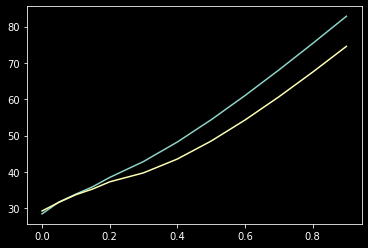

In [204]:
X_train2_scaled, X_valid_scaled, y_train2, y_valid = train_test_split(X_train_scaled, y_train, random_state=0, test_size=0.33)
training_errors = []
validation_errors = []
alphas = [0.0001, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for alpha in alphas:
    lr = TransformedTargetRegressor(regressor=Lasso(alpha=alpha),
                                    transformer=StandardScaler()).fit(X_train2_scaled, y_train2)
    training_errors.append(sqrt(mean_squared_error(y_train2, lr.predict(X_train2_scaled))))
    validation_errors.append(sqrt(mean_squared_error(y_valid, lr.predict(X_valid_scaled))))
print(training_errors)
print(validation_errors)
plt.plot(alphas, training_errors)
plt.plot(alphas, validation_errors)

*Cross Validation model*

In [208]:
#scikit chooses optimal values of params
pl = Pipeline([('poly', PolynomialFeatures()),
               ('norm', StandardScaler()),
               ('lasso', TransformedTargetRegressor(regressor=Lasso(max_iter=10000),transformer=StandardScaler()))])
param_grid = [
    {'poly__degree': [1, 2, 3, 4, 5, 6], 'lasso__regressor__alpha': [0.001, 0.01, 0.1, 1]}
]

#stored in a notebook variable called model
model = GridSearchCV(pl, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_params_)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Training RMSE: ", rmse)
print("Training R2: ", r2_score(y_train, pred_train))

print("\nThe r2 is notably close to 1 (.87) can be considered ideal and the RMSE"
      "\tbeing .28 demonstrates that the model can relatively predict the data accurately")

def printmd(string):
    display(Markdown(string))

#Create a markdown cell (using rmse)
printmd(f'All predictions are plus or minus {rmse} ')

/Users/Gutierya/Documents/School/Python_Schaffer/pythonProject2/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.042765987324840715, tolerance: 0.024499999999999994
  model = cd_fast.enet_coordinate_descent(
/Users/Gutierya/Documents/School/Python_Schaffer/pythonProject2/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031123159400245015, tolerance: 0.024499999999999994
  model = cd_fast.enet_coordinate_descent(
/Users/Gutierya/Documents/School/Python_Schaffer/pythonProject2/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03854700722534954, toler

{'lasso__regressor__alpha': 0.1, 'poly__degree': 5}
Training RMSE:  28.21317851255676
Training R2:  0.8784019257589333

The r2 is notably close to 1 (.87) can be considered ideal and the RMSE	being .28 demonstrates that the model can relatively predict the data accurately


All predictions are plus or minus 28.21317851255676 

In [206]:
X_grading = pd.read_csv('https://raw.githubusercontent.com/cdavidshaffer/CPSC4970-AI/master/data/m3test.csv')
predicted = model.predict(X_grading)